# Classifying movies: A binary classification example

Two-class classification, or binary classification, is one of the most common kinds of
machine learning problems. In this example, you’ll learn to classify movie reviews as
positive or negative, based on the text content of the reviews.


You’ll work with the IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.

In [1]:
import tensorflow

2023-03-12 22:23:32.352541: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# 1. Importing data

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
# only keep top 10,000 frequently occuring words

17464789/17464789 [==============================] - 12s 1us/step


In [3]:
train_data.shape

(25000,)

In [5]:
# each review is a set of word indices
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels
# 0 - neg, 1 - pos review

array([1, 0, 0, ..., 0, 1, 0])

In [9]:
# decoding a review
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(reverse_word_index.get(i-3, "?") for i in train_data[1])

In [10]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

# 2. Preparing data

In [12]:
len(train_data[0]), len(train_data[1])
# each review has a diff length
# also you can't use a list of integers as data
# need to convert to tensors

(218, 189)

2 ways to prepare data:
1. Pad lists so they have the same length, start model with a layer capable of handling integer tensors
2. Multi-hot encode lists to convert them into vectors of 0s and 1s, and start with a dense layer

In [25]:
# using 2nd method
import numpy as np
def vectorize_sequences(sequences, dimensions = 10000):
    
    # create a matrix of number of sequences x number of dimensions
    results = np.zeros((len(sequences), dimensions))
    
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1
    return results

In [27]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [29]:
# vectorising labels
y_train = np.asarray(train_labels).astype(np.float32)
y_test = np.asarray(test_labels).astype(np.float32)

In [30]:
y_train, y_test

(array([1., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))

# 3. Building model

In [31]:
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid"),
])

2023-03-12 22:38:47.791947: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-12 22:38:47.813425: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [34]:
model.compile(optimizer="rmsprop",
             loss="binary_crossentropy",
             metrics = ["accuracy"])

In [35]:
# splitting data
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [36]:
history = model.fit(partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.5403 - accuracy: 0.7763 - val_loss: 0.4036 - val_accuracy: 0.8685
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3229 - accuracy: 0.8959 - val_loss: 0.3126 - val_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2320 - accuracy: 0.9257 - val_loss: 0.2880 - val_accuracy: 0.8870
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1841 - accuracy: 0.9423 - val_loss: 0.2905 - val_accuracy: 0.8828
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1499 - accuracy: 0.9539 - val_loss: 0.2866 - val_accuracy: 0.8858
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1268 - accuracy: 0.9599 - val_loss: 0.2977 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1024 - accuracy: 0.9687 - val_loss: 0.3049 - val_accuracy: 0.8824
Epoch 8/20
30

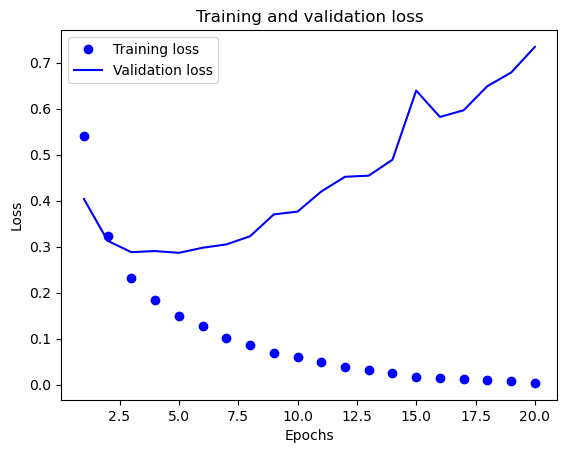

In [37]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

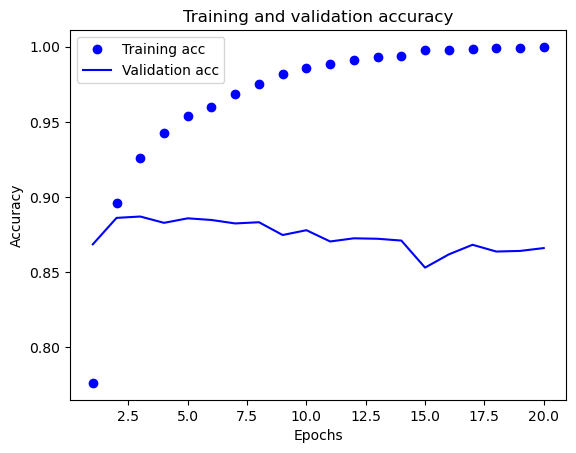

In [38]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

model is overfitting after 4th epoch

# 4. Creating a new model

In [39]:
model = keras.Sequential([
        layers.Dense(16, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")
        ])
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.4448 - accuracy: 0.8222
Epoch 2/4
49/49 [==============================] - 1s 17ms/step - loss: 0.2559 - accuracy: 0.9090
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1975 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 16s 21ms/step - loss: 0.3055 - accuracy: 0.8793


In [41]:
results

[0.30553698539733887, 0.8792799711227417]

In [40]:
# predicting on new data
model.predict(x_test)

782/782 [==============================] - 21s 26ms/step


array([[0.25075936],
       [0.99997056],
       [0.9612645 ],
       ...,
       [0.17385039],
       [0.10699952],
       [0.74869484]], dtype=float32)